# <a name = 'link0'>Introduction</a>

Used cars business still has long days to go. For a company operating in the business, one key operation is how to fix the sale price. Therefore, knowing what to pay attention to when fixing a used car price is of great importance. What are those variables that influence a used car price? That is the question we are attempting to answer in this work.

We will structure our work as follow:

- <a href = #link0>Introduction</a>
- <a href = #link1>Loading packages and data overview</a>
    - <a href = #link11>Importing necessary packages</a>
    - <a href = #link12>Dataset and data structures</a>
- <a href = #link2>Data preprocessing and Exploratory data analysis</a>
    - <a href = #link21>Datatype fixing</a>
    - <a href = #link22>Exploratory data analysis</a>
    - <a href = #link23>Missing values treatment</a>
    - <a href = #link24>Outliers treatment</a>
    - <a href = #link25>Features engineering</a>
- <a href = #link3>Modeling</a>
    - <a href = #link31>Data preparation for modeling</a>
    - <a href = #link32> sklearn regression</a>
    - <a href = #link33>statsmodels OLS</a>
    - <a href = #link34>Checking linear regression assumptions</a>
    - <a href = #link35>Predicting on test data</a>
- <a href = #link4>Conclusion</a>

# <a name = 'link1'>1.Loading packages and data overview</a>

## <a name = 'link11'>1.1 Importing necessary packages</a>

In [556]:
#importing usable packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
pd.options.display.float_format = '{:.5f}'.format
warnings.filterwarnings("ignore")
#%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

## <a name = 'link12'>1.2 Dataset and data structures</a>

### <a name = 'link'>1.2.1 Dataset loading</a>

In [557]:
# We load the dataset and make a copy we will use to preserve data integrity in case something goes wrong

data = pd.read_csv('used_cars_data.csv')
cars = data.copy()

### <a name = 'link'>1.2.2 Understanding of the data structures</a>

In [558]:
# Checking the shape of the data
cars.shape

(7253, 14)

In [559]:
print(f"The dataset is made of {cars.shape[0]} rows ansd {cars.shape[1]} columns")

The dataset is made of 7253 rows ansd 14 columns


In [560]:
#To take a look at a sample of 8 rows.

np.random.seed(2)
cars.sample(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4584,4584,Tata Tigor 1.05 Revotorq XT,Kochi,2018,28973,Diesel,Manual,First,24.7 kmpl,1047 CC,69 bhp,5.00000,NaN,6.64000
6505,6505,Volkswagen Vento Diesel Highline,Chennai,2011,76041,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00000,NaN,nan
3675,3675,Maruti Swift VDI,Ahmedabad,2012,65000,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.00000,NaN,3.90000
5654,5654,Hyundai i20 Magna Optional 1.2,Kochi,2014,42315,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.00000,NaN,4.79000
4297,4297,Toyota Camry 2.5 G,Mumbai,2014,68400,Petrol,Automatic,First,12.98 kmpl,2494 CC,178.4 bhp,5.00000,NaN,13.50000


- We can see that columns like `Mileage`, `Engine` and `Power` that should be expected to have integer are stored as string.
- There are some missing values and `New_Price` seems to have a bunch.
- The `S.No.` column is worthless for it is only and indexing column. So we can safely drop it.

In [561]:
cars = cars.drop(columns = ['S.No.'])

In [562]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


As we pointed out before, some columns datatypes need to be fixed. Also`New_Price`and `Price` have the most missing values.

# <a name = 'link2'>2. Data preprocessing and exploratory Data analysis</a>

## <a name = 'link21'>2.1. Data type fixing</a>

### Fixing `Mileage`, `Engine`, `Power` and `New_Price` columns

As we mention earlier, `Mileage`, `Engine`, `Power` and also `New_Price` columns need to be fixed as their values are encoded as string where they need to be numerical. Below we write two functions **val_to_num** and **Fix_New_Price** to apply to those columns to fix the issue.

In [563]:
# Function to fix Mileage, Power and Engine columns.
def val_to_num(x):
    '''
    This function takes off the unit of the values given as argument and convert the numeric part to float.
    '''
    if isinstance(x, str):
        try:
            return float(x.split(' ')[0].strip())
        except:
            return np.nan

In [564]:
# Applying val_to_num function to fix datatypes of some columns

cars['Engine'] = cars['Engine'].apply(val_to_num)
cars['Power'] = cars['Power'].apply(val_to_num)
cars['Mileage'] = cars['Mileage'].apply(val_to_num)

In [565]:
# A function to apply on New_Price column

def Fix_New_Price(x):
    '''
    The function is to fix the New_Price column of our dataset.
    It removes the unit and convert the value to float type. If the unit is Cr it converts it to Lakh.
    '''
    if isinstance(x, str):
        if x.split(" ")[1].strip() == 'Lakh':
            try:
                return float(x.split(" ")[0].strip())
            except:
                return np.nan
        else:
            try:
                return 100*float(x.split(" ")[0].strip())
            except:
                return np.nan

In [566]:
#Applying Fix_New_Price function to New_Price column

cars['New_Price'] = cars['New_Price'].apply(Fix_New_Price)

In [567]:
cars.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6765,Ford Fiesta 1.4 Duratec EXI Limited Edition,Chennai,2006,49000,Petrol,Manual,Second,16.60000,1388.00000,68.00000,5.00000,nan,nan
3426,Nissan Micra XV,Kolkata,2011,44000,Petrol,Manual,First,18.06000,1198.00000,75.00000,5.00000,nan,2.65000
397,Tata Xenon XT EX 4X2,Pune,2014,85000,Diesel,Manual,First,13.49000,2179.00000,138.03000,5.00000,nan,3.50000
1199,Nissan Terrano XL,Mumbai,2014,28238,Petrol,Manual,First,13.24000,1598.00000,102.50000,5.00000,nan,5.55000
6969,Hyundai i20 1.4 Asta AT (O) with Sunroof,Hyderabad,2009,75000,Petrol,Automatic,First,15.00000,1396.00000,100.00000,5.00000,nan,nan


In [568]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


The columns`Mileage`, `Engine`, `Power` and `New_Price` are now well encoded as float

### Changing the datatype of  some other columns

It is a good idea to treat `Fuel_Type`, `Transmission` and `Owner_Type` as categorical variables.

In [569]:
cars['Fuel_Type'] = cars['Fuel_Type'].astype('category')
cars['Transmission'] = cars['Transmission'].astype('category')
cars['Owner_Type'] = cars['Owner_Type'].astype('category')

In [570]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   object  
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7200 non-null   float64 
 11  New_Price          1006 non-null   float64 
 12  Price              6019 non-null   float64 
dtypes: category(3), float64(6), int64(2), object(2)
memory usage: 588.5+ KB


### Summary statistics of the dataset

In [571]:
cars.describe(include='all', percentiles=[.01, .25, .5, .75, .99]).T

,count,unique,top,freq,mean,std,min,1%,25%,50%,75%,99%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.00000,NaN,NaN,NaN,2013.36537,3.25442,1996.00000,2004.00000,2011.00000,2014.00000,2016.00000,2019.00000,2019.00000
Kilometers_Driven,7253.00000,NaN,NaN,NaN,58699.06315,84427.72058,171.00000,4074.16000,34000.00000,53416.00000,73000.00000,173480.00000,6500000.00000
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.00000,NaN,NaN,NaN,18.14158,4.56220,0.00000,0.00000,15.17000,18.16000,21.10000,28.09000,33.54000
Engine,7207.00000,NaN,NaN,NaN,1616.57347,595.28514,72.00000,796.00000,1198.00000,1493.00000,1968.00000,2996.00000,5998.00000
Power,7078.00000,NaN,NaN,NaN,112.76521,53.49355,34.20000,38.40000,75.00000,94.00000,138.10000,282.00000,616.00000


**Observations:**

- The majority of cars use `Diesel` as fuel. also, manually transmitted cars are the most represented.
- Cars have for most of them had only one previous user.
- `Kilometers_Driven` do have some weird extreme values.
- `Engine`, `Power`, `New_price` and `Price` do have extreme values as well, but they are likely to be true.

In [572]:
cars[cars.Name==cars[cars.Kilometers_Driven == cars.Kilometers_Driven.max()]['Name'].values[0]]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97000,2993.00000,258.00000,5.00000,nan,65.00000
4101,BMW X5 xDrive 30d M Sport,Chennai,2016,45000,Diesel,Automatic,First,15.97000,2993.00000,258.00000,5.00000,nan,57.00000
5740,BMW X5 xDrive 30d M Sport,Chennai,2017,21000,Diesel,Automatic,Second,15.97000,2993.00000,258.00000,5.00000,nan,55.00000


## <a name = 'link22'>2.2. Exploratory data analysis</a>

## Univariate analysis

In [573]:
# We borrow this function from a case study file to plot histogram and box plots of numerical features

def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2)
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  
        sharex=True,  
        gridspec_kw={"height_ratios": (0.3, 0.7)},
        figsize=figsize,
    )  
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="red"
    )  
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )
    
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plots of `Price`

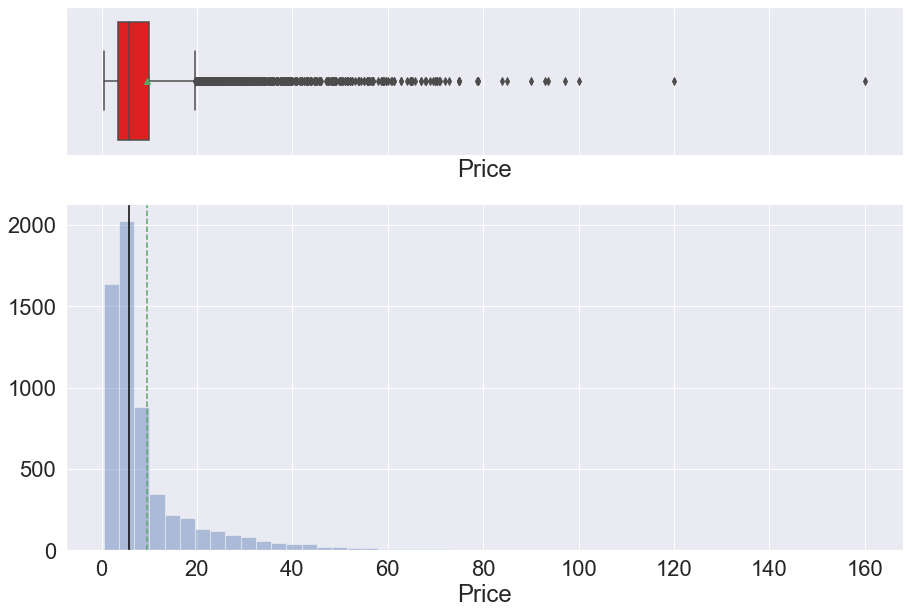

In [574]:
histogram_boxplot(cars['Price'], bins = 50)

### Plots of `New_Price`

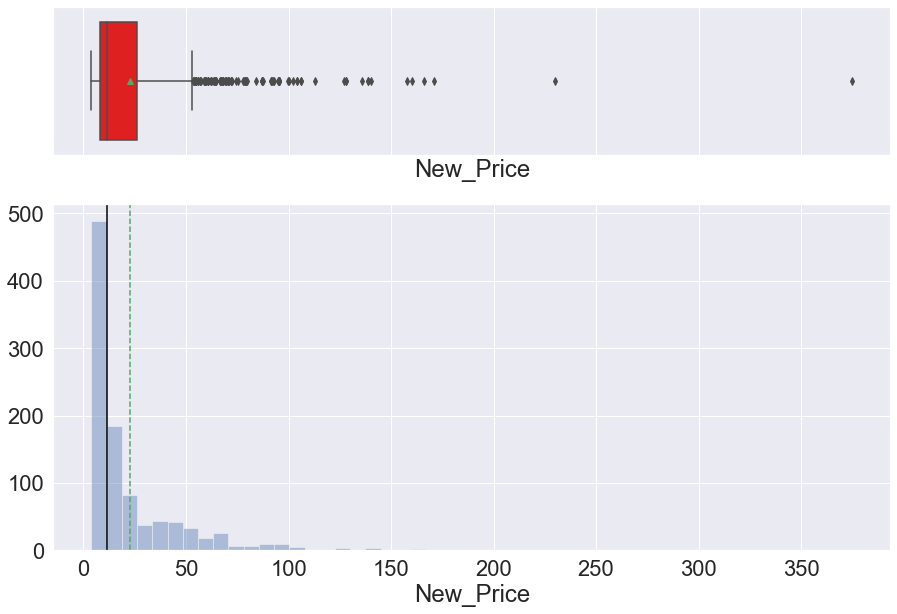

In [575]:
histogram_boxplot(cars['New_Price'])

### Plots of `Power`

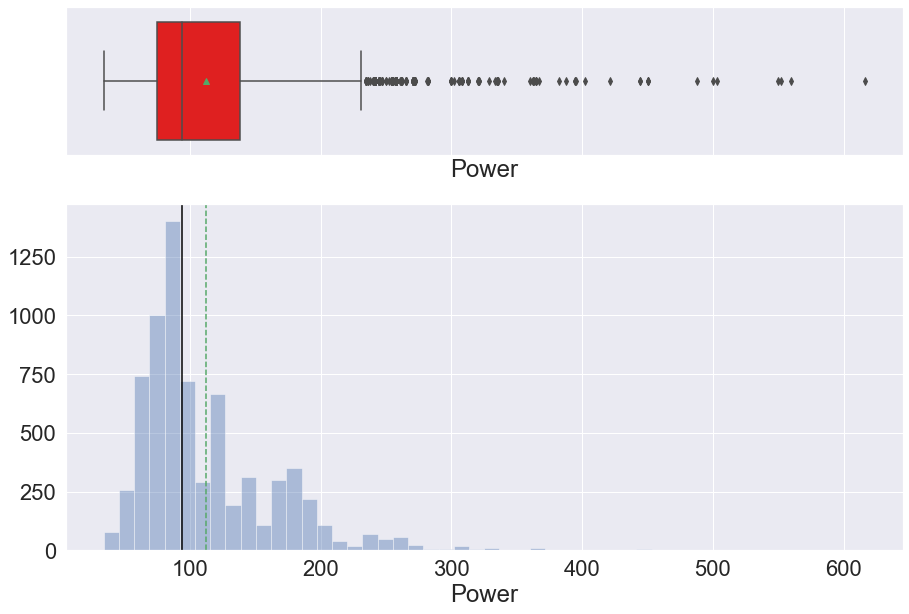

In [576]:
histogram_boxplot(cars['Power'])

### Plots of `Engine`

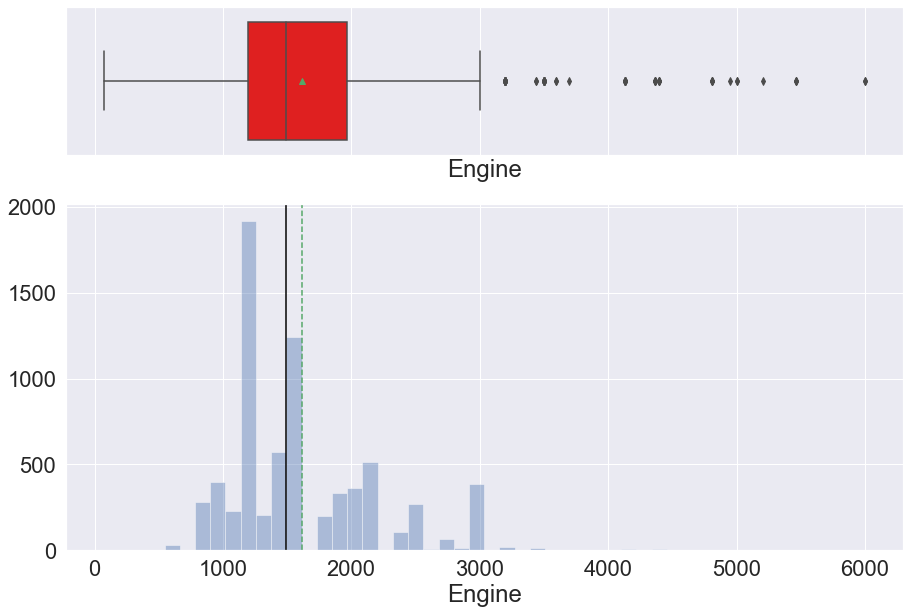

In [577]:
histogram_boxplot(cars['Engine'])

### Plots of `Mileage`

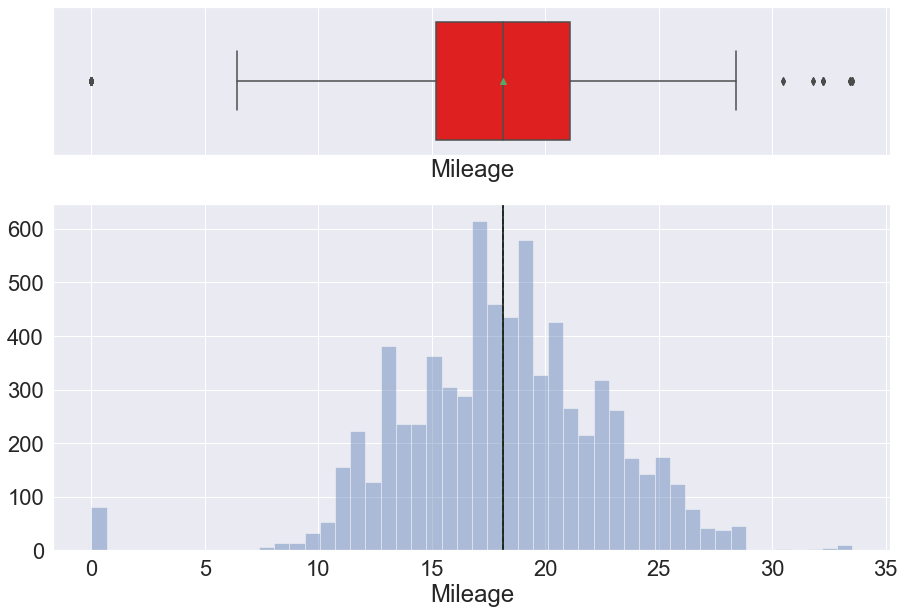

In [578]:
histogram_boxplot(cars['Mileage'])

### Plots of `Kilometers_Driven`

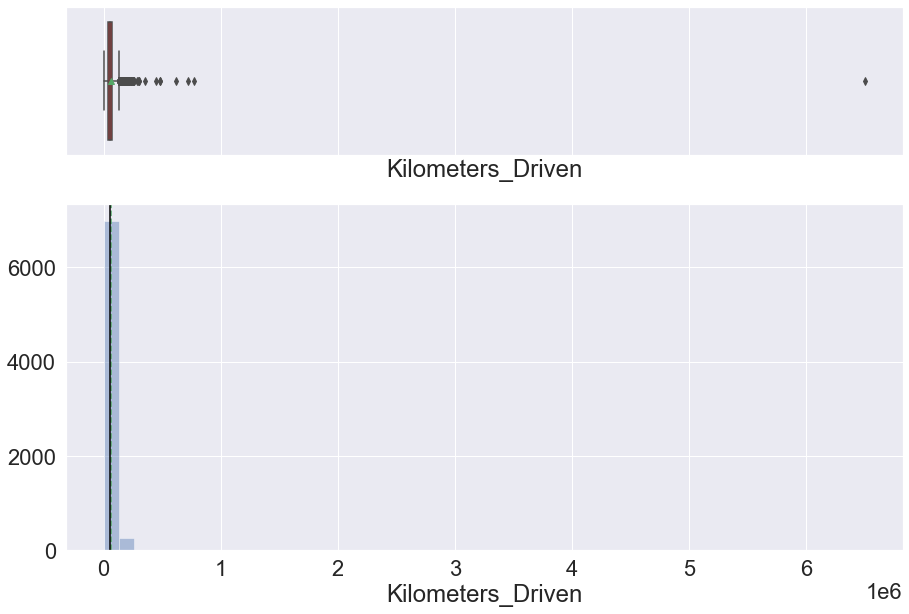

In [579]:
histogram_boxplot(cars['Kilometers_Driven'])

**Observations:**

As a general observation, all the above plotted variables are right skewed exception of `Mileage` Which has a quasi normal distribution

### Bivariate analysis

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

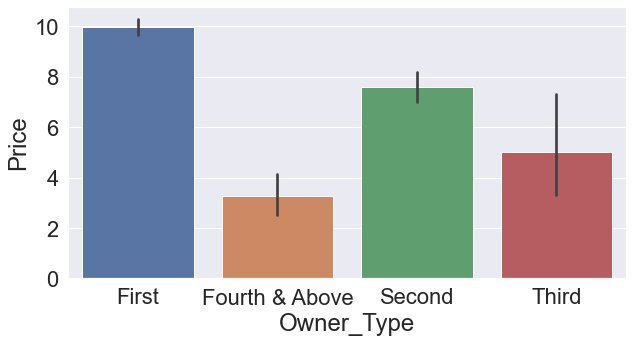

In [580]:
plt.figure(figsize=(10,5))
sns.barplot(data=cars, y='Price', x='Owner_Type')

The more number of users a car already had, the cheaper it is.

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

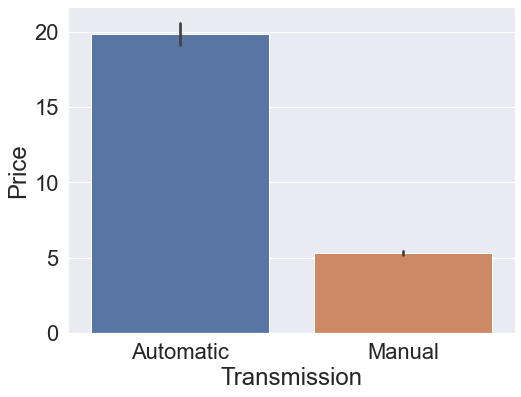

In [581]:
plt.figure(figsize=(8,6))
sns.barplot(data=cars, y='Price', x='Transmission')

On average, Manual cars are cheaper than automatic ones

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

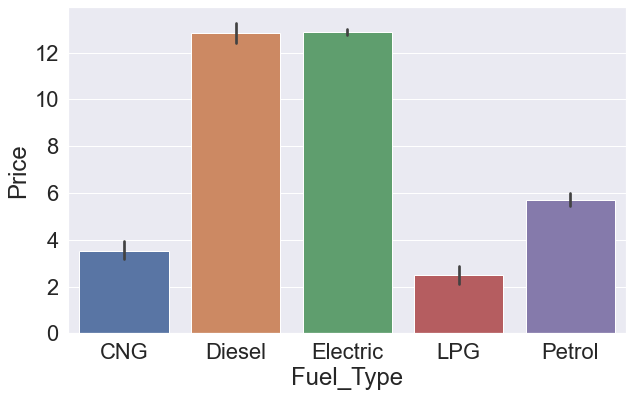

In [582]:
plt.figure(figsize=(10,6))
sns.barplot(data=cars, y='Price', x='Fuel_Type')

Cars that run wiht `Diesel` are the most expensive on average, followed by electric cars.

<AxesSubplot:xlabel='Seats', ylabel='Price'>

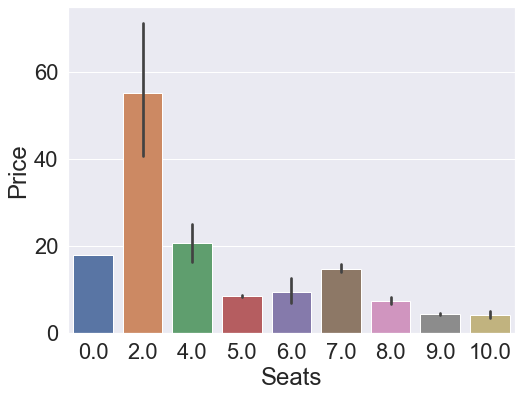

In [583]:
plt.figure(figsize=(8,6))
sns.barplot(data=cars, x='Seats', y='Price')

- Two-seat cars are the most expensive. When taking a look at them, we notice that they are all luxury sport cars.
- Four-seat cars as well are also in majority luxury cars. That explains their average high price.

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

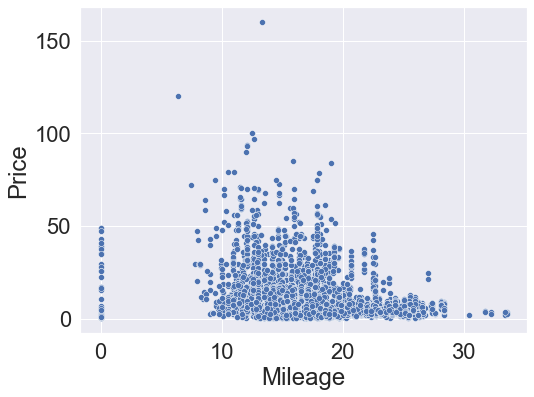

In [584]:
#Plotting Price vs Mileage
plt.figure(figsize=(8,6))
sns.scatterplot(data=cars, y='Price', x='Mileage')

It seems like, lower `Mileage` cars are more expensive

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Price'>

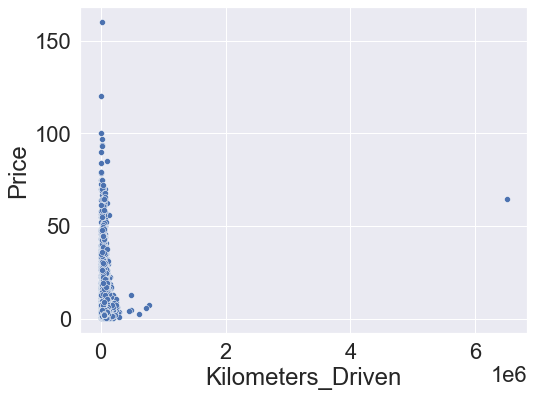

In [585]:
#Plotting Price vs Kilometers_Driven
plt.figure(figsize=(8,6))
sns.scatterplot(data=cars, y='Price', x='Kilometers_Driven')

<AxesSubplot:xlabel='Engine', ylabel='Price'>

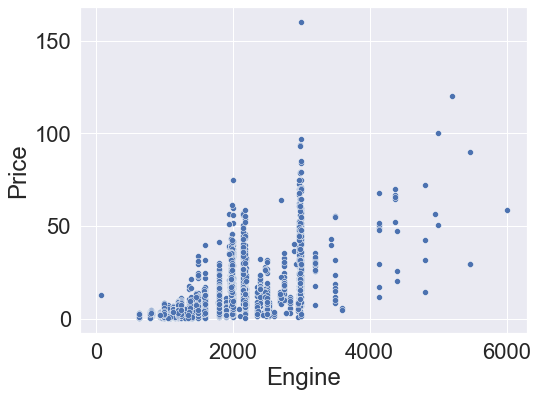

In [586]:
#Plotting Price vs Engine
plt.figure(figsize=(8,6))
sns.scatterplot(data=cars, y='Price', x='Engine')

The higher the displacement volume of a car’s engine, the more expensive that car is.


<AxesSubplot:xlabel='Power', ylabel='Price'>

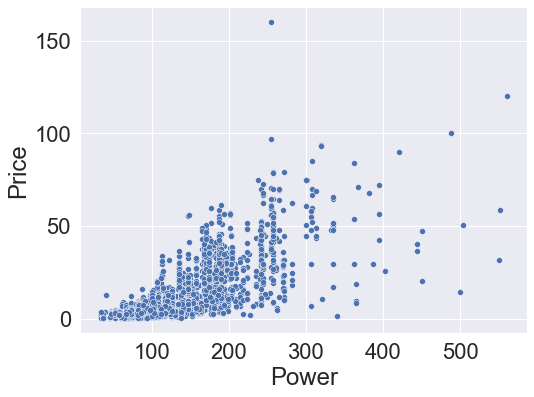

In [587]:
#Plotting Price vs Power
plt.figure(figsize=(8,6))
sns.scatterplot(data=cars, y='Price', x='Power')

The more powerful the engine of a car, the more expensive the car is.


<AxesSubplot:xlabel='Year', ylabel='Price'>

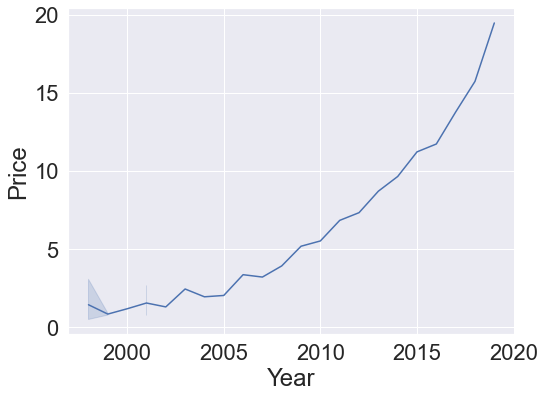

In [588]:
#Plotting Price vs Year
plt.figure(figsize=(8,6))
sns.lineplot(data=cars, y='Price', x='Year')

As we should expect, the more recent a car is, the more expensive it is as well

<AxesSubplot:>

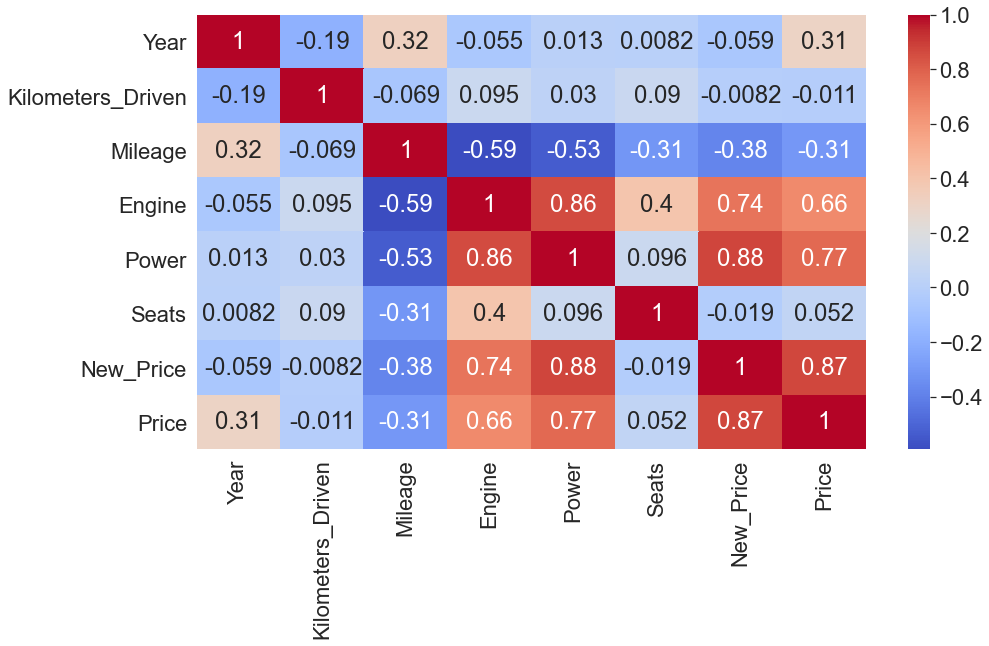

In [589]:
plt.figure(figsize=(15,8))
sns.heatmap(cars.corr(), cmap = 'coolwarm', annot= True)

- As we could predict it, `Price` is highly correlated to `New_Price`.
- `Price` is also higly correlated to `power` and `Engine`. That is a predictable result as well.
- The surprising thing is the negatuive high correlation of `Price` to `Mileage`. Cars that consume the most are normally expected to be expensive, not the way around.

## <a name = 'link23'>2.3. Missing values treatment</a>

In [590]:
## Let's see the missing values we have

cars.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

Observations:**
- Seven columns have no missing values
- `Mileage` has only two missing values; `Engine` has **46**, `seats`, **53** and `Power` has **175** missing values.
- `Price` misses **1234** and `New_Price` misses up to **6277** that is more than **85\%** of the vlues are missing.

In [591]:
#Let's see the Mileage missing values

cars[cars.Mileage.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,nan,72.00000,41.00000,5.00000,13.58000,13.00000
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,nan,1798.00000,73.00000,5.00000,nan,12.75000


Since these are the only **Electric** cars in our dataset and will both more likely be either in the training set or in the test set, we find better to just drop the observations.

In [592]:
# Getting rid of observations with missing values in Mileage
cars = cars[~cars['Mileage'].isnull()]

In [593]:
#Let's see missing values in Engine column
cars[cars['Engine'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00000,nan,nan,nan,nan,2.95000
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10000,nan,nan,nan,nan,2.11000
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10000,nan,nan,nan,nan,1.75000
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00000,nan,nan,nan,nan,26.50000
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80000,nan,nan,nan,nan,3.20000
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10000,nan,nan,nan,nan,5.80000
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00000,nan,nan,nan,nan,1.50000
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00000,nan,nan,nan,nan,40.88000
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10000,nan,nan,nan,nan,3.15000
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.00000,nan,nan,nan,nan,1.93000


**Note:**

All the observations where `Engine` is missing have`Power` and `Seats` missing as well.
We will try to handle those columns at the same time.

In [594]:
# We store in the variable names the unique names of the cars which observations miss Engine
num = len(cars[cars['Engine'].isnull()])
names = cars[cars['Engine'].isnull()]['Name'].unique()
print(num)
print(len(names))

46
23


- There are 23 unique cars in the observations where `Engine` is missing, for a total of 46 observations.
- What we will do now is, for each of these 23 cars, we will take a look at the subdataframes with the same names. 
- If it happens that `Engine`, `Power`, `Seats` or `Price` have valid values for some observations of tose subdataframes, we will use them to fill the `null` if we find appropriate to do so.

In [595]:
cars[cars['Name']==names[0]]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00000,nan,nan,nan,nan,2.95000
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00000,nan,nan,nan,nan,1.50000
3305,Honda City 1.5 GXI,Jaipur,2007,75055,Petrol,Manual,First,12.80000,1493.00000,100.00000,5.00000,nan,2.30000
4767,Honda City 1.5 GXI,Mumbai,2005,81000,Petrol,Manual,Second,12.80000,1493.00000,100.00000,5.00000,nan,1.10000
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.00000,nan,nan,nan,nan,1.85000


In [596]:
cars[cars['Name']==names[10]]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2530,BMW 5 Series 520d Sedan,Kochi,2014,64158,Diesel,Automatic,First,18.48000,nan,nan,nan,nan,17.89000
2623,BMW 5 Series 520d Sedan,Pune,2012,95000,Diesel,Automatic,Second,18.48000,nan,nan,nan,nan,18.00000
3272,BMW 5 Series 520d Sedan,Mumbai,2008,81000,Diesel,Automatic,Second,18.48000,nan,nan,nan,nan,10.50000
3520,BMW 5 Series 520d Sedan,Delhi,2012,90000,Diesel,Automatic,First,18.48000,nan,nan,nan,nan,14.50000
4577,BMW 5 Series 520d Sedan,Delhi,2012,72000,Diesel,Automatic,Third,18.48000,nan,nan,nan,nan,13.85000
6643,BMW 5 Series 520d Sedan,Bangalore,2009,150000,Diesel,Automatic,Second,18.48000,nan,nan,nan,nan,nan
6880,BMW 5 Series 520d Sedan,Chennai,2009,95000,Diesel,Automatic,Second,18.48000,nan,nan,nan,nan,nan


**Observations:**

We have two scenarios:
- One where there cars of the same names which have informations on the targeted columns. In that case, we will just use those informations to fill the missing values.
- The other scenario is the one where no car of the same name has any information for the targeted columns. In that case, we search for cars which names start with the same first two letters (Those first two letters generally represent the make and the model of the car. The remaining informations on the names are just variants of the model and they ususally don't differ too much from the other members of the model, at least for the features that interest us here.). We then use the median of the informations on each column to fill the missing values.

In [597]:
#Function to fill the NaN

def fill_null(df, col, ref):
    """
    This is a function to fill NaN values in the dataframe df on column col.
    
    Its load in a list of references refs the unique values of the reference 
    column ref obtained from the subdatafranme where the values of col are NaN.
    
    For each element of refs, it check whether there are observations with the same value in the ref column
    that have not NaN. If it is the case, it fills the NaN with that value. If it is not the case, its filters
    the dataframe with the first two words of the element name in the ref column (In our study those two words
    are the make and model of the car) and impute the median of the values in col to the NaN values.
    If that dataframe(filtered with the first two letters) doesn't have informations two use, it tries the same 
    operation this time with only the first word (representing the make of the car in our case.)
    
    """
    
    refs = df[df[col].isnull()][ref].unique() 
    
    for item in refs:
        found = False
        init = item.split(" ")
        init1 = init[0] + " " + init[1]
        index = df[df[ref]==item].index
        
        for idx in index:
            if df.loc[idx, col] == df.loc[idx, col]:
                subs = df.loc[idx, col]
                found = True
                break
        
        if found:
            
            for idx in index:
                if df.loc[idx, col] != df.loc[idx, col]:
                    df.loc[idx, col] = subs          
        else:
            
            for idx in df[df[ref].str.contains(init1)].index:
                if df.loc[idx, col] == df.loc[idx, col]:
                    found = True
                    break
            if found:
                for idx in index:
                    df.loc[idx, col] = df[df[ref].str.contains(init1)][col].quantile(.5)
            else:
                for idx in index:
                    df.loc[idx, col] = df[df[ref].str.contains(init[0])][col].quantile(.5)
                    
    return df

########################################
########################################

def multiple_fill_null(df, cols, ref):
    
    for col in cols:
        df = fill_null(df, col, ref)
        
    return df
                    

In [598]:
# Applying to fill NaN in Engine, Power and Seats

cols = ['Engine', 'Power', 'Seats']
ref = 'Name'

cars = multiple_fill_null(cars, cols, ref)

**Observations:**
    
- Not for all the elements of the list ***names*** were we able to fix the missing values.
- We did it for three elements only, for a total of 6 observations filled.
- The others subdataframes had all null in all the columns concerned. An example is showed below.

In [599]:
# Checking if it worked for the first scenario
cars[cars['Name']=='Honda City 1.5 GXI']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00000,1493.00000,100.00000,5.00000,nan,2.95000
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00000,1493.00000,100.00000,5.00000,nan,1.50000
3305,Honda City 1.5 GXI,Jaipur,2007,75055,Petrol,Manual,First,12.80000,1493.00000,100.00000,5.00000,nan,2.30000
4767,Honda City 1.5 GXI,Mumbai,2005,81000,Petrol,Manual,Second,12.80000,1493.00000,100.00000,5.00000,nan,1.10000
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.00000,1493.00000,100.00000,5.00000,nan,1.85000


In [600]:
# Checking if it worked for the second scenario
cars[cars['Name']=='BMW 5 Series 520d Sedan']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2530,BMW 5 Series 520d Sedan,Kochi,2014,64158,Diesel,Automatic,First,18.48000,1995.00000,190.00000,5.00000,nan,17.89000
2623,BMW 5 Series 520d Sedan,Pune,2012,95000,Diesel,Automatic,Second,18.48000,1995.00000,190.00000,5.00000,nan,18.00000
3272,BMW 5 Series 520d Sedan,Mumbai,2008,81000,Diesel,Automatic,Second,18.48000,1995.00000,190.00000,5.00000,nan,10.50000
3520,BMW 5 Series 520d Sedan,Delhi,2012,90000,Diesel,Automatic,First,18.48000,1995.00000,190.00000,5.00000,nan,14.50000
4577,BMW 5 Series 520d Sedan,Delhi,2012,72000,Diesel,Automatic,Third,18.48000,1995.00000,190.00000,5.00000,nan,13.85000
6643,BMW 5 Series 520d Sedan,Bangalore,2009,150000,Diesel,Automatic,Second,18.48000,1995.00000,190.00000,5.00000,nan,nan
6880,BMW 5 Series 520d Sedan,Chennai,2009,95000,Diesel,Automatic,Second,18.48000,1995.00000,190.00000,5.00000,nan,nan


In [601]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7251 non-null   object  
 1   Location           7251 non-null   object  
 2   Year               7251 non-null   int64   
 3   Kilometers_Driven  7251 non-null   int64   
 4   Fuel_Type          7251 non-null   category
 5   Transmission       7251 non-null   category
 6   Owner_Type         7251 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7251 non-null   float64 
 9   Power              7249 non-null   float64 
 10  Seats              7251 non-null   float64 
 11  New_Price          1005 non-null   float64 
 12  Price              6017 non-null   float64 
dtypes: category(3), float64(6), int64(2), object(2)
memory usage: 964.9+ KB


In [602]:
#Let's see remaining observations with Power missing

cars[cars.Power.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.00000,799.00000,nan,2.00000,nan,3.00000
6216,Hindustan Motors Contessa 2.0 DSL,Pune,1996,65000,Diesel,Manual,Second,14.10000,1995.00000,nan,5.00000,nan,nan


In [603]:
cars[cars['Name'].str.contains('Smart')]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.00000,799.00000,nan,2.00000,nan,3.00000


In [604]:
cars[cars['Name'].str.contains('Hindustan')]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6216,Hindustan Motors Contessa 2.0 DSL,Pune,1996,65000,Diesel,Manual,Second,14.10000,1995.00000,nan,5.00000,nan,nan


**Note:**
- The remaining two observations are each the only representant of its make. We will just drop them.
- Since the selling price of a used car is not determined based on its new price but rather on the actuel condition of the car at the moment of sale, and given the faact that `New_Price` has more than **85\%** of missing values, we drop it.
- We also go ahead and drop any other observation with missing values.

In [605]:
#Drpping New_Price column and any remaining missing values
cars=cars[['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']].dropna()
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6016 non-null   object  
 1   Location           6016 non-null   object  
 2   Year               6016 non-null   int64   
 3   Kilometers_Driven  6016 non-null   int64   
 4   Fuel_Type          6016 non-null   category
 5   Transmission       6016 non-null   category
 6   Owner_Type         6016 non-null   category
 7   Mileage            6016 non-null   float64 
 8   Engine             6016 non-null   float64 
 9   Power              6016 non-null   float64 
 10  Seats              6016 non-null   float64 
 11  Price              6016 non-null   float64 
dtypes: category(3), float64(5), int64(2), object(2)
memory usage: 488.1+ KB


## <a name = 'link24'>2.4. Outliers treatment</a>

In [606]:
cars.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,6016,1873,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,6016,11,Mumbai,789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6016.00000,NaN,NaN,NaN,2013.35904,3.26951,1998.00000,2011.00000,2014.00000,2016.00000,2019.00000
Kilometers_Driven,6016.00000,NaN,NaN,NaN,58734.92537,91289.54942,171.00000,34000.00000,53000.00000,73000.00000,6500000.00000
Fuel_Type,6016,4,Diesel,3204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6016,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6016,4,First,4927,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,6016.00000,NaN,NaN,NaN,18.13798,4.57670,0.00000,15.17000,18.15500,21.10000,33.54000
Engine,6016.00000,NaN,NaN,NaN,1620.55535,600.24019,624.00000,1198.00000,1493.00000,1984.00000,5998.00000
Power,6016.00000,NaN,NaN,NaN,112.65739,53.82436,34.20000,74.00000,93.70000,138.10000,560.00000


### Treating `Mileage` and `Seats` with value 0

A car cannot have a `Mileage` of zero. It cannot have not seats as well To fix that, we proceed the same way we did for the NaN.

In [607]:
cars[cars['Mileage']==0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.00000,2179.00000,115.00000,5.00000,17.50000
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.00000,1950.00000,194.00000,5.00000,35.67000
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00000,1086.00000,62.10000,5.00000,1.30000
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00000,1493.00000,100.00000,5.00000,2.95000
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.00000,1498.00000,99.00000,5.00000,3.60000
262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,0.00000,1086.00000,62.10000,5.00000,1.75000
307,Hyundai Santro Xing XL,Chennai,2006,58000,Petrol,Manual,Second,0.00000,1086.00000,62.10000,5.00000,1.50000
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.00000,1968.00000,138.03000,5.00000,5.45000
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.00000,1086.00000,62.10000,5.00000,3.35000
544,Mercedes-Benz New C-Class Progressive C 200,Kochi,2019,13190,Petrol,Automatic,First,0.00000,1950.00000,181.43000,5.00000,38.99000


In [608]:
Names = cars[cars['Mileage']==0]['Name']
len(Names)

67

There are 67 observations with a zero `Mileage` value.

In [609]:
#Functions to fix the zeros

def fix_zeros(df, col, ref):
    
    
    refs = df[df[col]==0][ref].unique()

    for item in refs:
        found = False
        init = item.split(" ")[:2]
        init1 = init[0] + " " + init[1]
        index = df[df[ref]==item].index

        for idx in index:
            if df.loc[idx, col] != 0:
                subs = df.loc[idx, col]
                found = True
                break
        if found:
            for idx in index:
                if df.loc[idx, col] == 0:
                    df.loc[idx, col] = subs
        else:
            for idx in df[df[ref].str.contains(init1)].index:
                if df.loc[idx, col] != 0:
                    found = True
                    break
            if found:
                for idx in index:
                    df.loc[idx, col] = df[df[ref].str.contains(init1)][col].quantile(.5)
            else:
                for idx in index:
                    df.loc[idx, col] = df[df[ref].str.contains(init[0])][col].quantile(.5)

    return df

###########################################
###########################################

def fix_all_zeros(df, cols, ref):
    
    for col in cols:
        df = fix_zeros(df, col, ref)
        
    return df

In [610]:
# Applying to Mileage and Seats

columns = ['Mileage', 'Seats']
ref = 'Name'

cars = fix_all_zeros(cars, columns, ref)

In [611]:
cars.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,6016,1873,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,6016,11,Mumbai,789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6016.00000,NaN,NaN,NaN,2013.35904,3.26951,1998.00000,2011.00000,2014.00000,2016.00000,2019.00000
Kilometers_Driven,6016.00000,NaN,NaN,NaN,58734.92537,91289.54942,171.00000,34000.00000,53000.00000,73000.00000,6500000.00000
Fuel_Type,6016,4,Diesel,3204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6016,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6016,4,First,4927,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,6016.00000,NaN,NaN,NaN,18.30504,4.17728,6.40000,15.29000,18.16000,21.10000,33.54000
Engine,6016.00000,NaN,NaN,NaN,1620.55535,600.24019,624.00000,1198.00000,1493.00000,1984.00000,5998.00000
Power,6016.00000,NaN,NaN,NaN,112.65739,53.82436,34.20000,74.00000,93.70000,138.10000,560.00000


In [612]:
cars[cars['Engine']==5998]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5521,Bentley Continental Flying Spur,Hyderabad,2006,48000,Petrol,Automatic,First,8.60000,5998.00000,552.00000,4.00000,59.00000


In [613]:
cars[cars['Name'].str.contains('Bentley')]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5521,Bentley Continental Flying Spur,Hyderabad,2006,48000,Petrol,Automatic,First,8.60000,5998.00000,552.00000,4.00000,59.00000


**Note:**

 Only one car has an `Engine` of 5998 and it is also the only representant of its make. So we will drop it.

In [614]:
cars.drop(labels = 5521, inplace = True)

In [615]:
# Before we proceed, let's change Seats to categorical type

cars['Seats'] = cars['Seats'].astype('category')

**Note:**
- The below functions are borrowed from our course materials
- They cap or floor values to 1.5 times the IQR above the third quartile or below the first quartile.
- We use it to finish the treatment of outliers

In [616]:
# Let's treat outliers by flooring and capping
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [617]:
numerical_col = cars.select_dtypes(include=np.number).columns.tolist()
cars = treat_outliers_all(cars, numerical_col)

In [618]:
cars.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,6015,1872,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,6015,11,Mumbai,789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6015.00000,NaN,NaN,NaN,2013.37623,3.21213,2003.50000,2011.00000,2014.00000,2016.00000,2019.00000
Kilometers_Driven,6015.00000,NaN,NaN,NaN,56103.47648,30043.84004,171.00000,34000.00000,53000.00000,73000.00000,131500.00000
Fuel_Type,6015,4,Diesel,3204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6015,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6015,4,First,4926,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,6015.00000,NaN,NaN,NaN,18.29960,4.15323,6.57500,15.29000,18.16000,21.10000,29.81500
Engine,6015.00000,NaN,NaN,NaN,1612.43225,569.18432,624.00000,1198.00000,1493.00000,1984.00000,3163.00000
Power,6015.00000,NaN,NaN,NaN,110.81273,47.18025,34.20000,74.00000,93.70000,138.10000,234.25000


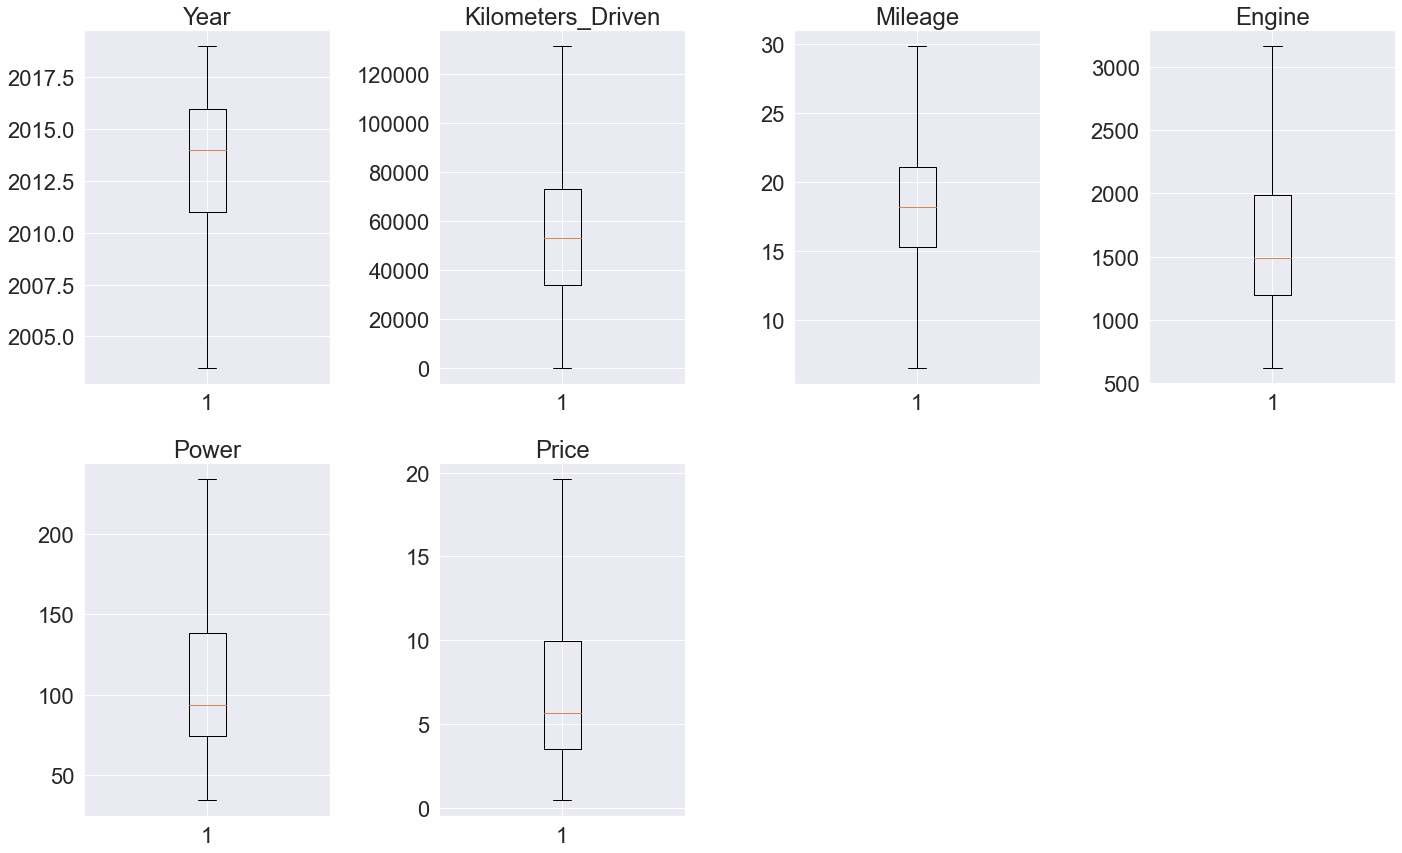

In [619]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(cars[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## <a name = 'link25'>2.5. Features engineering</a>

In [620]:
# Making a copy of data
dta = cars.copy()

In [621]:
dta[dta['Name'].str.contains('Ambassador')]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1221,Ambassador Classic Nova Diesel,Chennai,2003.50000,80000,Diesel,Manual,Third,12.80000,1489.00000,35.50000,5.00000,1.35000


In [622]:
#Dropping the only representant of Ambassador brand

dta.drop(index = 1221, inplace=True)

In [623]:
# Creation a column (Make) for the car makes. Use the first word of car name.
dta['Make'] = dta["Name"]
for idx in dta.index:
    dta.loc[idx, 'Make'] = dta.loc[idx, 'Make'].split(' ')[0]
    
dta.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Make
0,Maruti Wagon R LXI CNG,Mumbai,2010.00000,72000,CNG,Manual,First,26.60000,998.00000,58.16000,5.00000,1.75000,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.00000,41000,Diesel,Manual,First,19.67000,1582.00000,126.20000,5.00000,12.50000,Hyundai
2,Honda Jazz V,Chennai,2011.00000,46000,Petrol,Manual,First,18.20000,1199.00000,88.70000,5.00000,4.50000,Honda
3,Maruti Ertiga VDI,Chennai,2012.00000,87000,Diesel,Manual,First,20.77000,1248.00000,88.76000,7.00000,6.00000,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.00000,40670,Diesel,Automatic,Second,15.20000,1968.00000,140.80000,5.00000,17.74000,Audi


In [624]:
# Let's create dummy variables from our categorical variables.

cars = pd.get_dummies(cars, columns=['Fuel_Type', 'Transmission', 'Owner_Type', "Seats"])
dta = pd.get_dummies(dta, columns=['Fuel_Type', 'Transmission', 'Owner_Type', "Seats", 'Make'])

In [625]:
# We merge Make_Isuzu and Make_ISUZU for they are the same.(Noticed in data manipulations)

for idx in dta.index:
    dta.loc[idx, 'Make_Isuzu'] += dta.loc[idx, 'Make_ISUZU']

In [626]:
dta.drop(columns=['Make_ISUZU'], inplace=True)

In [627]:
## Name and Location are not interesting for this analysis, so we drop them

dta.drop(columns=['Name', 'Location'], inplace = True)
cars.drop(columns=['Name', 'Location'], inplace = True)

In [628]:
dta.shape

(6014, 52)

In [629]:
#Z-scaling
colus = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']

for col in colus:
    cars[col] = StandardScaler().fit_transform(cars[[col]])
    dta[col] = StandardScaler().fit_transform(dta[[col]])

# <a name = 'link3'>3. Modeling</a>

## <a name = 'link31'>3.1. Data preparation for modeling</a>

In [630]:
#Definition of target and predicting variables

y = cars[['Price']]
X = cars.drop(columns=['Price', "Fuel_Type_Electric"])
yy = dta[['Price']]
XX = dta.drop(columns=['Price', "Fuel_Type_Electric"])

In [631]:
# Splitting the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=42)

## <a name = 'link32'>3.2. sklearn linear regression</a>

In [632]:
# We choose here the LinearRegresion model from sklearn

modelX = LinearRegression()
modelXX = LinearRegression()

In [633]:
# Fitting the model

modelX.fit(X_train, y_train)
modelXX.fit(XX_train, yy_train)

LinearRegression()

In [634]:
# Display the coefficients of our model

coefX = pd.DataFrame(
                        np.append(modelX.intercept_[0], modelX.coef_[0]),
                        index = ["Intercept"] + X_train.columns.tolist(),
                        columns = ["Coeffs"]
                     )

coefX

,Coeffs
Intercept,-196.75706
Year,0.09778
Kilometers_Driven,-0.06568
Mileage,-0.10544
Engine,0.03563
Power,0.52328
Fuel_Type_CNG,0.00799
Fuel_Type_Diesel,0.15758
Fuel_Type_LPG,0.07739
Fuel_Type_Petrol,-0.24296


In [635]:
# Display the coefficients of our model with car Make

coefXX = pd.DataFrame(
                        np.append(modelXX.intercept_[0], modelXX.coef_[0]),
                        index = ["Intercept"] + XX_train.columns.tolist(),
                        columns = ["Coeffs"]
                     )

coefXX

,Coeffs
Intercept,-204.72233
Year,0.10178
Kilometers_Driven,-0.05155
Mileage,-0.09988
Engine,0.05976
Power,0.29707
Fuel_Type_CNG,-0.07257
Fuel_Type_Diesel,0.17567
Fuel_Type_LPG,0.02417
Fuel_Type_Petrol,-0.12727


In [636]:
# Script borrowed from course materials

# defining function for MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# defining common function for all metrics
def model_perf(model, inp, out):
    """
    model: model
    inp: independent variables
    out: dependent variable
    """
    y_pred = model.predict(inp).flatten()
    y_act = out.values.flatten()

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },
        index=[0],
    )

In [637]:
# Checking modelX performance on train set

print("Train Performance\n")
model_perf(modelX, X_train, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,0.30673,-30.27169,0.40984,0.83284


In [638]:
# Checking modelX performance on test set

print("Test Performance\n")
model_perf(modelX, X_test, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,0.30968,13.97293,0.40817,0.83150


**Note:**

The modelX yields low values for **MAE**, **RMSE**, and the **R-square** of **83\%** for both training and testing set.
This an overall good result.

In [639]:
# Checking modelXX performance on train set

print("Train Performance\n")
model_perf(modelXX, XX_train, yy_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,0.24507,4.08616,0.32818,0.89259


In [640]:
# Checking modelXX performance on train set

print("Train Performance\n")
model_perf(modelXX, XX_test, yy_test)

Train Performance



,MAE,MAPE,RMSE,R^2
0,0.25074,-11.01818,0.33341,0.88811


**Note:**

The modelXX yields low values for **MAE**, **RMSE**, and the **R-square** of **88\%** for both training and testing set.
This an overall good result.

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

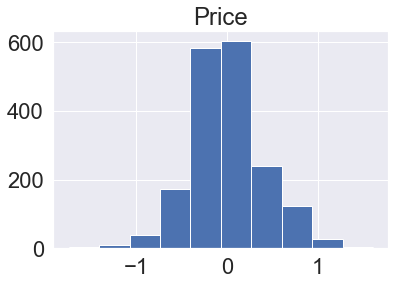

In [641]:
#Residus plot of modelX
eX = y_test - modelX.predict(X_test)
eX.hist()

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

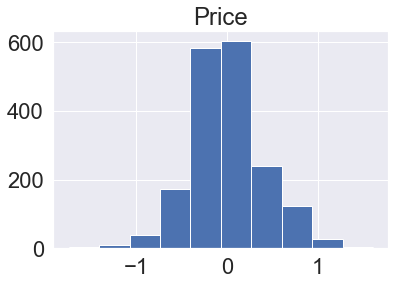

In [642]:
#Plot of residus of modelXX
eXX = yy_test - modelXX.predict(XX_test)
eX.hist()

**Observation:**

The shapes of the residus plots look normal, with an expexted value of zero. The model might be well specified. But there still are some verifications to make.

## <a name = 'link33'>3.3. statsmodels OLS</a>

In [643]:
# Let's build linear regression model using statsmodel
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
X = sm.add_constant(X)
XX = sm.add_constant(XX)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
XX_train1, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=42)

In [644]:
#Running model without car Make
ols_modelX1 = sm.OLS(y_train, X_train1)
ols_resX1 = ols_modelX1.fit()

print(ols_resX1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     1099.
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        22:25:50   Log-Likelihood:                -2218.4
No. Observations:                4210   AIC:                             4477.
Df Residuals:                    4190   BIC:                             4604.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [645]:
#Running model with car Make
ols_modelXX1 = sm.OLS(yy_train, XX_train1)
ols_resXX1 = ols_modelXX1.fit()

print(ols_resXX1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     768.8
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        22:25:50   Log-Likelihood:                -1282.7
No. Observations:                4209   AIC:                             2657.
Df Residuals:                    4163   BIC:                             2949.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Observation:**

- Both models with and withou car Make have all coefficients significants
- Adjusted R-square for model without make is **83\%** and with make **89\%** which pretty good

As stated earlier, before validating, we need to do some verifications. We are going to ckeck for the linear regression assumptions.

## <a name = 'link34'>3.4. Checking linear regression assumptions</a>

We will be checking the following Linear Regression assumptions:

- **No Multicollinearity**

- **Mean of residuals should be 0**

- **No Heteroscedasticity**

- **Linearity of variables**

- **Normality of error terms**

### <a name = 'link'>3.4.1 Test for multicolinearity</a>

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity the linear model, the coefficients that the model suggests are unreliable.

* We will check multicolinearity by using Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model. 

* **General Rule of thumb**: If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence, the variance of $\beta_k$ is not inflated at all. Whereas, if VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity, and if it is 10 or exceeding 10, it shows signs of high multicollinearity.

In [646]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_seriesX1 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])], index=X.columns
)
print("VIF Scores: \n\n{}\n".format(vif_seriesX1))

VIF Scores: 

const                       0.00000
Year                        1.91319
Kilometers_Driven           1.72096
Mileage                     3.64902
Engine                      8.97676
Power                       6.69404
Fuel_Type_CNG                   inf
Fuel_Type_Diesel                inf
Fuel_Type_LPG                   inf
Fuel_Type_Petrol                inf
Transmission_Automatic          inf
Transmission_Manual             inf
Owner_Type_First                inf
Owner_Type_Fourth & Above       inf
Owner_Type_Second               inf
Owner_Type_Third                inf
Seats_2.0                       inf
Seats_4.0                       inf
Seats_5.0                       inf
Seats_6.0                       inf
Seats_7.0                       inf
Seats_8.0                       inf
Seats_9.0                       inf
Seats_10.0                      inf
dtype: float64



In [647]:
vif_seriesXX1 = pd.Series(
    [variance_inflation_factor(XX_train1.values, i) for i in range(XX_train1.shape[1])], index=XX.columns
)
print("VIF Scores: \n\n{}\n".format(vif_seriesXX1))

VIF Scores: 

const                        0.00000
Year                         2.01865
Kilometers_Driven            1.78961
Mileage                      4.40248
Engine                      11.14311
Power                        9.72632
Fuel_Type_CNG                    inf
Fuel_Type_Diesel                 inf
Fuel_Type_LPG                    inf
Fuel_Type_Petrol                 inf
Transmission_Automatic           inf
Transmission_Manual              inf
Owner_Type_First                 inf
Owner_Type_Fourth & Above        inf
Owner_Type_Second                inf
Owner_Type_Third                 inf
Seats_2.0                        inf
Seats_4.0                        inf
Seats_5.0                        inf
Seats_6.0                        inf
Seats_7.0                        inf
Seats_8.0                        inf
Seats_9.0                        inf
Seats_10.0                       inf
Make_Audi                        inf
Make_BMW                         inf
Make_Chevrolet          

**Note:**

All our dummies have an infinite VIF. This is maybe because they are all considered in the data. Let's drop one dummy per categorical variable.

In [648]:
X_train2 = X_train1.drop(columns=["Fuel_Type_Diesel", "Transmission_Manual", "Owner_Type_First", "Seats_2.0" ])

vif_seriesX2 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])], index=X_train2.columns
)
print("VIF Scores: \n\n{}\n".format(vif_seriesX2))

VIF Scores: 

const                       761021.10926
Year                             1.91319
Kilometers_Driven                1.72096
Mileage                          3.64902
Engine                           8.97676
Power                            6.69404
Fuel_Type_CNG                    1.04428
Fuel_Type_LPG                    1.02198
Fuel_Type_Petrol                 2.49202
Transmission_Automatic           2.07339
Owner_Type_Fourth & Above        1.01448
Owner_Type_Second                1.13446
Owner_Type_Third                 1.07960
Seats_4.0                       14.15630
Seats_5.0                      115.85561
Seats_6.0                        6.47918
Seats_7.0                       86.51499
Seats_8.0                       20.70836
Seats_9.0                        1.41482
Seats_10.0                       2.04733
dtype: float64



In [649]:
ols_modelX2 = sm.OLS(y_train, X_train2)
ols_resX2 = ols_modelX2.fit()

print(ols_resX2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     1099.
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        22:25:55   Log-Likelihood:                -2218.4
No. Observations:                4210   AIC:                             4477.
Df Residuals:                    4190   BIC:                             4604.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [650]:
XX_train2 = XX_train1.drop(columns = ["Fuel_Type_Diesel", "Transmission_Manual", "Owner_Type_First", "Seats_2.0",
                                      "Make_Audi" ])

vif_seriesXX2 = pd.Series(
    [variance_inflation_factor(XX_train2.values, i) for i in range(XX_train2.shape[1])], index=XX_train2.columns
)
print("VIF Scores: \n\n{}\n".format(vif_seriesXX2))

VIF Scores: 

const                       809657.74555
Year                             2.01865
Kilometers_Driven                1.78961
Mileage                          4.40248
Engine                          11.14311
Power                            9.72632
Fuel_Type_CNG                    1.06478
Fuel_Type_LPG                    1.02401
Fuel_Type_Petrol                 3.10736
Transmission_Automatic           2.28738
Owner_Type_Fourth & Above        1.01529
Owner_Type_Second                1.14434
Owner_Type_Third                 1.09087
Seats_4.0                       12.12267
Seats_5.0                       93.81103
Seats_6.0                        6.16482
Seats_7.0                       70.84303
Seats_8.0                       16.52619
Seats_9.0                        1.37549
Seats_10.0                       1.72613
Make_BMW                         2.15630
Make_Chevrolet                   1.87891
Make_Datsun                      1.11905
Make_Fiat                        1.20239
Ma

In [651]:
ols_modelXX2 = sm.OLS(yy_train, XX_train2)
ols_resXX2 = ols_modelXX2.fit()

print(ols_resXX2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     768.8
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        22:26:00   Log-Likelihood:                -1282.7
No. Observations:                4209   AIC:                             2657.
Df Residuals:                    4163   BIC:                             2949.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Note:**

- The VIF of the features in both models (with and without car Make) are small, except for `Engine` and `Power`. This suugests colinearity between the two variables. The correlation coefficient between the two is **0.85** which is pretty high. We will drop one of them, namely `Engine`that has the highest VIF.
- For categorical variables, the VIF of dummies `Seats_5.0` among `Seats` dumies, and `Make_Maruti` among `Make` dummies are the highest above or close to 10. So we will drop them instead of `Seats_2.0` and `Make_Audi` we dropped earlier.
- All the features coefficients are significant, and a bunch of dummies as well.
- `Owner_Type` dummies coefficients are all not significant. We will drop them and see what happens.

In [652]:
X_train3 = X_train1.drop(columns=["Fuel_Type_Diesel", "Transmission_Manual", "Owner_Type_First", "Seats_5.0", "Engine",
                                 "Owner_Type_Second", "Owner_Type_Third", "Owner_Type_Fourth & Above"])

vif_seriesX3 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])], index=X_train3.columns
)
print("VIF Scores: \n\n{}\n".format(vif_seriesX3))

VIF Scores: 

const                    702987.86077
Year                          1.77001
Kilometers_Driven             1.69983
Mileage                       2.96528
Power                         3.47589
Fuel_Type_CNG                 1.04351
Fuel_Type_LPG                 1.01720
Fuel_Type_Petrol              2.01482
Transmission_Automatic        2.06944
Seats_2.0                     1.01593
Seats_4.0                     1.03461
Seats_6.0                     1.02714
Seats_7.0                     1.50428
Seats_8.0                     1.21735
Seats_9.0                     1.00626
Seats_10.0                    1.02153
dtype: float64



In [653]:
ols_modelX3 = sm.OLS(y_train, X_train3)
ols_resX3 = ols_modelX3.fit()

print(ols_resX3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     1390.
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        22:26:01   Log-Likelihood:                -2221.9
No. Observations:                4210   AIC:                             4476.
Df Residuals:                    4194   BIC:                             4577.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -199

In [654]:
XX_train3 = XX_train1.drop(columns = ["Fuel_Type_Diesel", "Transmission_Manual", "Owner_Type_First", "Seats_5.0",
                        "Make_Maruti", "Engine", "Owner_Type_Second", "Owner_Type_Third", "Owner_Type_Fourth & Above" ])

vif_seriesXX3 = pd.Series(
    [variance_inflation_factor(XX_train3.values, i) for i in range(XX_train3.shape[1])], index=XX_train3.columns
)
print("VIF Scores: \n\n{}\n".format(vif_seriesXX3))

VIF Scores: 

const                    751970.08592
Year                          1.87381
Kilometers_Driven             1.77743
Mileage                       3.82983
Power                         5.43812
Fuel_Type_CNG                 1.06398
Fuel_Type_LPG                 1.02034
Fuel_Type_Petrol              2.58078
Transmission_Automatic        2.28670
Seats_2.0                     1.20583
Seats_4.0                     1.23430
Seats_6.0                     1.72174
Seats_7.0                     2.34518
Seats_8.0                     1.50126
Seats_9.0                     1.01816
Seats_10.0                    1.02608
Make_Audi                     2.09597
Make_BMW                      2.52247
Make_Chevrolet                1.12914
Make_Datsun                   1.01429
Make_Fiat                     1.03217
Make_Force                    1.01119
Make_Ford                     1.31853
Make_Honda                    1.59997
Make_Hyundai                  1.74984
Make_Isuzu                    1.0119

In [655]:
ols_modelXX3 = sm.OLS(yy_train, XX_train3)
ols_resXX3 = ols_modelXX3.fit()

print(ols_resXX3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     840.4
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        22:26:03   Log-Likelihood:                -1292.1
No. Observations:                4209   AIC:                             2668.
Df Residuals:                    4167   BIC:                             2935.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -207

**Observations:**

- The VIF are now quite normal, all below 5 for the model without vehicles' make and only one slightly above 5 for the model with Make.
- All feature coefficients are significant.
- Of the 26 `Make` dummies, only five are not significants. `Make` definitely does play a role on price.
- The R-square and adjuted R-square have not changed beside the dropping of `Owner_Type` dummies. So the `Owner_Type` doesn't really influence the price.
- Coefficients signs are consistent in the two models.
- We keep the model with `Make`.

### <a name = 'link'>3.4.2 Nullity of the mean of residus </a>

In [656]:
#Let's calculate the mean of residus of our model.

In [657]:
residual = ols_resXX3.resid
np.mean(residual)

-1.2756586526528598e-13

**Observation:**

Mean residuls is very small, close to zero.    

### <a name = 'link'>3.4.3 Test of linearity </a>

In [658]:
residual = ols_resXX3.resid
fitted = ols_resXX3.fittedvalues

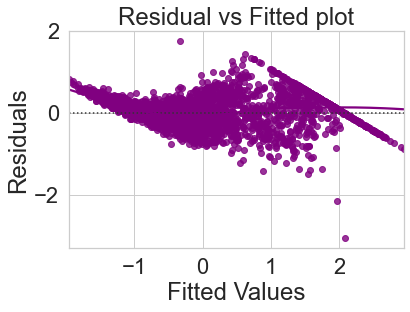

In [659]:
sns.set_style("whitegrid")
sns.residplot(fitted, residual, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted plot")
plt.show()

**Note:**
- The plot shows the distribution of residuals vs fitted values.
- We cannot identify any pattern in the plot, hence, the relationship between `Price` and each of the variables considered in our model is linear.

### <a name = 'link'>3.4.4 Test of normality </a>

### Plot of residuals distribution

In [660]:
residual = ols_resXX3.resid

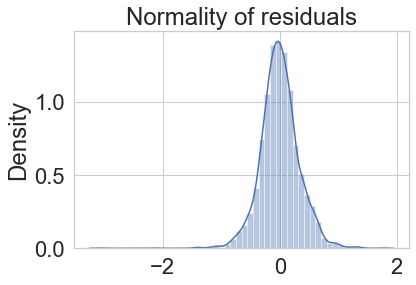

In [661]:
sns.distplot(residual)
plt.title("Normality of residuals")
plt.show()

**Observation:**

The shape of the residual distribution is so close to the normal distribution.

### QQ plot test

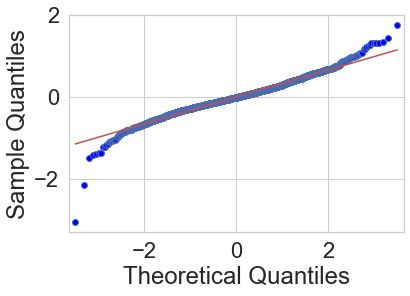

In [662]:
sm.qqplot(residual, line='s')
plt.show()

**Observation:**

QQ plot test shows the residus are normal.

### <a name = 'link'>3.4.5 Test for homoscedasticity </a>

In order to test the homoscedasticity, we use the goldfeldquandt test.
For goldfeldquandt test, the null and alternate hypotheses are as follows:

- Null hypothesis : Residuals are homoscedastic
- Alternate hypothesis : Residuals have heteroscedasticity

In [663]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residual, XX_train3)
lzip(name, test)

[('F statistic', 0.9965472963487284), ('p-value', 0.5313044758744322)]

The p-value is greater than 0.05, we fail to reject the null hypothesis of homoscedasticity of residuals.

## <a name = 'link35'>3.5. Predicting on test data</a>

In [664]:
XX_test_final = XX_test[XX_train3.columns]

In [665]:
XX_test_final.head()

,const,Year,Kilometers_Driven,Mileage,Power,Fuel_Type_CNG,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Seats_2.0,Seats_4.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0,Make_Audi,Make_BMW,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Honda,Make_Hyundai,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
319,1.00000,2008.00000,2.50981,-0.28910,-0.86549,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4889,1.00000,2014.00000,-0.20303,-0.73219,1.95833,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3102,1.00000,2010.00000,2.45942,0.40926,-0.90789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5525,1.00000,2016.00000,-0.60433,-0.83333,1.20404,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
84,1.00000,2013.00000,1.44924,1.17985,-0.78196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [666]:
# Checking model performance on train set
print("Train Performance\n")
model_perf(ols_resXX3, XX_train3.values, yy_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,0.24546,1.35616,0.32891,0.89211


In [667]:
# Checking model performance on test set
print("Test Performance\n")
model_perf(ols_resXX3, XX_test_final.values, yy_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,0.24992,-10.15347,0.33198,0.88907


* The model has low test and train RMSE and MAE, and both the errors are comparable. So, our model is not suffering from overfitting.

* The model is able to explain almost 89% of the variation on the test set, which is very good.



**We can conclude the model *ols_resXX3* is good for prediction as well as inference purposes.**

### Model summary

In [668]:
ols_modelXX3 = sm.OLS(yy_train, XX_train3)
ols_resXX3 = ols_modelXX3.fit()

print(ols_resXX3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     840.4
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        22:26:33   Log-Likelihood:                -1292.1
No. Observations:                4209   AIC:                             2668.
Df Residuals:                    4167   BIC:                             2935.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -207

# <a name = 'link4'>Conclusion</a>

- The coefficient of `Year` suggest that, the newer the car the more expensive. This makes total sense. Our model suggest that a one year newer car is about 0.1 Lakh more expensive.
- Cars' sales price decrease with the number of kilometers on the odometer. That is what the negative sign of the `Kilometers_Driven` coefficient suggests. This as well is consistent with the reality of the market. All else being equal, a car with more kilometers on the odometer is less valuable.
- The more powerful the engine, the more expensive the car. That is why sport cars are expensive.
- The higher the `Mileage` of a car the cheaper the car. this also makes total sense. High mileage means less fuel consumption; people with modest means prefer those cars. Besides, sport and luxury cars consume a lot since their engine are more powerful.
- All else being equal, `Diesel` cars are the more expensive. More often, the more powerful engine run with diesel. 
- `Automatic` transmission cars are more expensive than `Manual` ones.
- Two, Four and Seven seats cars are significantly more expensive than the Five seats ones. More usual cars are five seats, from cheap to luxury. In general, two seats cars are either luxury or sport cars or both. In either case , those are expensive cars. For seats cars are usually luxury ones as well. Seven seats are family cars, that are most expensive than the common five seats, so are heigth seats which coefficient is not far from the level of significance in the model with car Make.
- Well known expensive car brands (Mercedes, Lamborghini, BMW, Porsche) are showed to have significant positive coeffients in the model. That is as a sign that the model is good.